<a href="https://colab.research.google.com/github/Agarwalapurva/Data-Science-Job-Trend-Analysis/blob/main/ML_Project_WageWizard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing essential libraries
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data_science_jobs/glassdoor_jobs.csv')
# Lets see the dataset
df.head()

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [ ]:
print('Shape before moving:{}'.format(df.shape))
df.drop(labels=['Unnamed: 0'],axis='columns',inplace=True)
print('Shape before moving:{}'.format(df.shape))

Shape before moving:(956, 15)
Shape before moving:(956, 14)


<ipython-input-5-fc47bc6ddbc4>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Rating'])


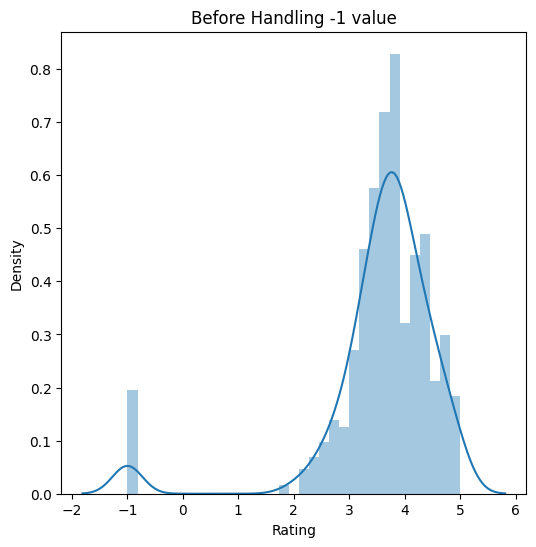

In [ ]:
# Import Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Visualising 'Rating' column
plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Rating'])
p = plt.title('Before Handling -1 value')

In [ ]:
# Handling -1. Values in Rating column
df['Rating'] = df['Rating'].apply(lambda x: np.NaN if x==-1 else x)
df['Rating'] = df['Rating'].fillna(df['Rating'].mean())
df['Rating'].min()

1.9

<ipython-input-7-74e4349f0677>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Rating',data=df,orient='v',palette='Set1')


Text(0, 0.5, 'Rating')

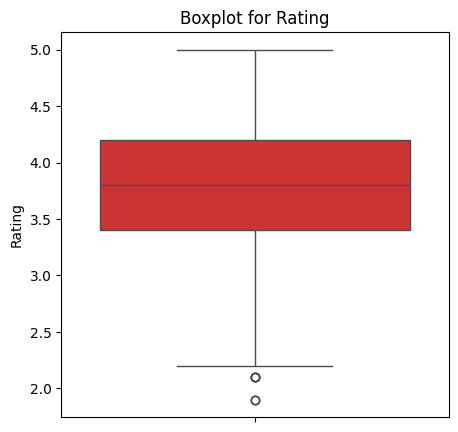

In [ ]:
# Lets Check outliers in 'Rating' Column
plt.figure(figsize=(5,5))
sns.boxplot(y='Rating',data=df,orient='v',palette='Set1')
plt.title('Boxplot for Rating')
plt.ylabel('Rating')

In [ ]:
# Handling -1 values in Founded column
df['Founded'] = df['Founded'].apply(lambda x: np.NaN if x==-1 else x)
df['Founded'] = df['Founded'].fillna(int(df['Founded'].median()))
df['Founded'] = df['Founded'].astype('int')
df['Founded'].min()

1744

<ipython-input-9-889f4c6146c5>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y='Founded', data=df, orient='v', palette='Set1')


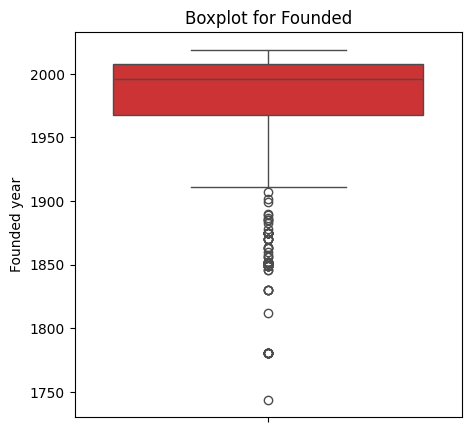

In [ ]:
# Lets check the Outliers in Founded
plt.figure(figsize=(5,5))
sns.boxplot(y='Founded', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Founded')
p = plt.ylabel('Founded year')

In [ ]:
# Lets Clean the 'Job Title' Column
df['Job Title'].value_counts().nlargest(20)

,count
Job Title,
Data Scientist,178
Data Engineer,68
Senior Data Scientist,42
Data Analyst,18
Senior Data Engineer,17
Business Intelligence Analyst,13
Senior Data Analyst,12
Lead Data Scientist,8
Data Science Manager,7


In [ ]:
# In this function we just first converted the job role into lower case and then to proper name
def title_cleaner(title):
    if 'data scientist' in title.lower() or 'scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'data analyst' in title.lower():
        return 'data analyst'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'other'
# Applying function
df['job_title']= df['Job Title'].apply(title_cleaner)
df['job_title'].value_counts()

,count
job_title,
data scientist,560
data engineer,158
data analyst,105
other,72
manager,35
director,13
mle,13


In [ ]:
# Lets Check the seniority has high value employers
def title_seniority(title):
    if 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'sr'
    elif 'junior' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'other'

In [ ]:
df['job_seniority'] = df['Job Title'].apply(title_seniority)
df['job_seniority'].value_counts()

,count
job_seniority,
other,701
sr,252
jr,3


In [ ]:
# Remove the Job Title Column
df.drop(labels = ['Job Title'], axis=1 ,inplace =True)

In [ ]:
# Cleaning Salary Estimate column
salary = df['Salary Estimate'].apply(lambda x: x.split("(")[0])
salary

,Salary Estimate
0,$53K-$91K
1,$63K-$112K
2,$80K-$90K
3,$56K-$97K
4,$86K-$143K
...,...
951,$72K-$133K
952,$56K-$91K
953,$95K-$160K
954,-1


In [ ]:
salary = salary.apply(lambda x: np.NaN if x=='-1' else x)
salary

,Salary Estimate
0,$53K-$91K
1,$63K-$112K
2,$80K-$90K
3,$56K-$97K
4,$86K-$143K
...,...
951,$72K-$133K
952,$56K-$91K
953,$95K-$160K
954,NaN


In [ ]:
# Removing '$' and 'K' from 'Salary Estimate' column
salary = salary.apply(lambda x: x if type(x)== type(3.5) else x.replace('$','').replace('K',''))
salary

,Salary Estimate
0,53-91
1,63-112
2,80-90
3,56-97
4,86-143
...,...
951,72-133
952,56-91
953,95-160
954,NaN


In [ ]:
# Finding any inconsistencies in the salary
print("Length of Salary: ",len(salary.unique()))
salary.unique()[380:]

Length of Salary:  417


array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 Per Hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ',
       'Employer Provided Salary:120-140', '65-113 ', '59-125 ',
       '80-142 ', '62-113 '], dtype=object)

In [ ]:
# Removing the string employer provided salary from salary array
salary = salary.apply(lambda x: x if type(x)==type(3.5) else x.lower().replace("employer provided salary:", ""))
salary.unique()[380:]

array(['42-79 ', '84-153 ', '44-73 ', '40-87 ', '72-142 ', '74-137 ',
       '57-109 ', '136-208 ', '171-272 ', '65-126 ', '118-228 ',
       '113-182 ', '58-104 ', '58-108 ', '81-161 ', '115-220 ', '71-144 ',
       '32-57 ', '79-136 ', '48-113 ', '27-47 per hour', '68-125 ',
       '39-67 ', '71-135 ', '61-123 ', '87-141 ', '71-121 ', '72-121 ',
       '51-88 ', '101-141 ', '79-127 ', '81-132 ', '120-140', '65-113 ',
       '59-125 ', '80-142 ', '62-113 '], dtype=object)

In [ ]:
# Converting per hour salaries to per year salaries
def hourly_to_yearly(minlimit, maxlimit):
  x = minlimit.strip()
  y = maxlimit.strip()
  x = int(int(minlimit)*45*52/1000)
  y = int(int(maxlimit)*45*52/1000)
  return '{}-{}'.format(x,y)

salary = salary.apply(lambda x: x if type(x)==type(3.5) else (hourly_to_yearly(x.lower().replace("per hour", "").split('-')[0], x.lower().replace("per hour", "").split('-')[1]) if "per hour" in x.lower() else x))
salary.unique()[:38]

array(['53-91 ', '63-112 ', '80-90 ', '56-97 ', '86-143 ', '71-119 ',
       '54-93 ', '86-142 ', '38-84 ', '120-160 ', '126-201 ', '64-106 ',
       '106-172 ', '46-85 ', '83-144 ', '102-190 ', '67-137 ', '118-189 ',
       '110-175 ', '64-111 ', '81-130 ', '73-119 ', '86-139 ', '63-105 ',
       nan, '109-177 ', '63-110 ', '75-124 ', '34-61 ', '72-120 ',
       '93-149 ', '85-140 ', '77-135 ', '82-132 ', '83-137 ', '115-180 ',
       '74-138 ', '64-112 '], dtype=object)

<ipython-input-21-c0da71dbc6a1>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Salary'])


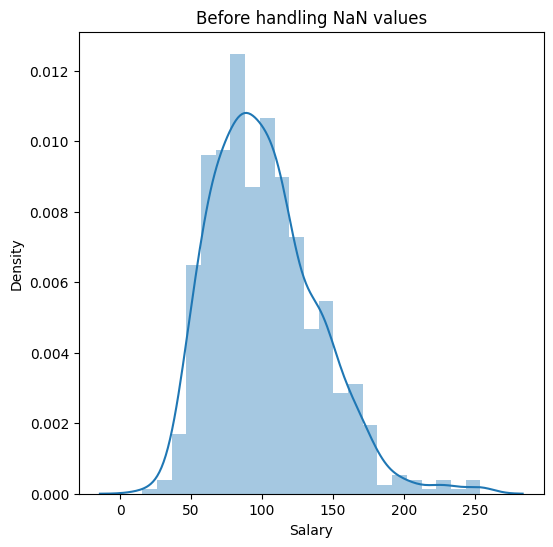

In [ ]:
# Creating column for salary i.e. average of the range
df['Salary'] = salary.apply(lambda x:  x if type(x)==type(3.5) else (int(x.split("-")[0]) + int(x.split("-")[1].strip()))/2)

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('Before handling NaN values')

<ipython-input-22-735d4d4d0761>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=df['Salary'])


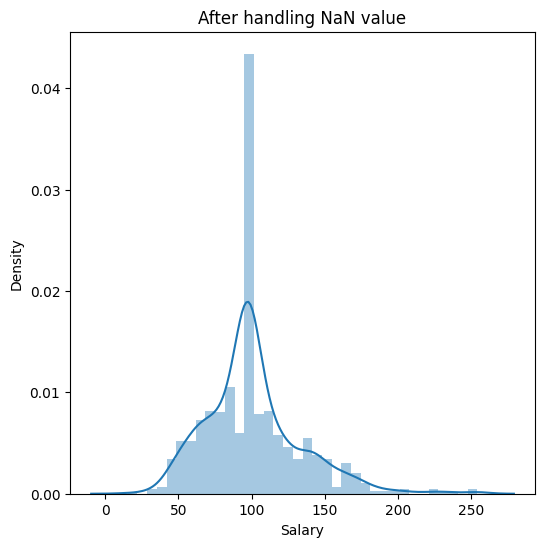

In [ ]:
# Handling NaN values in Salary column
df['Salary'] = df['Salary'].fillna(df['Salary'].median())

plt.figure(figsize=(6,6))
g = sns.distplot(a=df['Salary'])
p = plt.title('After handling NaN value')

<ipython-input-23-b3bb66439111>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.boxplot(y='Salary', data=df, orient='v', palette='Set1')


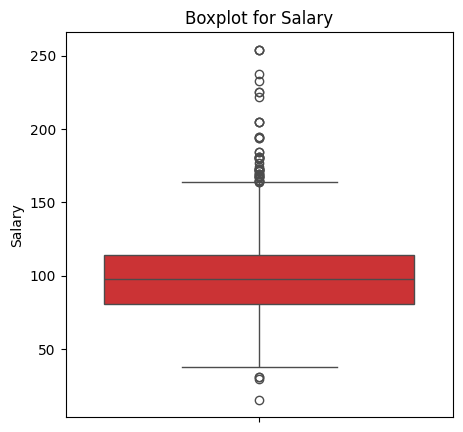

In [ ]:
# Outliers in Salary
plt.figure(figsize=(5,5))
g = sns.boxplot(y='Salary', data=df, orient='v', palette='Set1')
p = plt.title('Boxplot for Salary')
p = plt.ylabel('Salary')

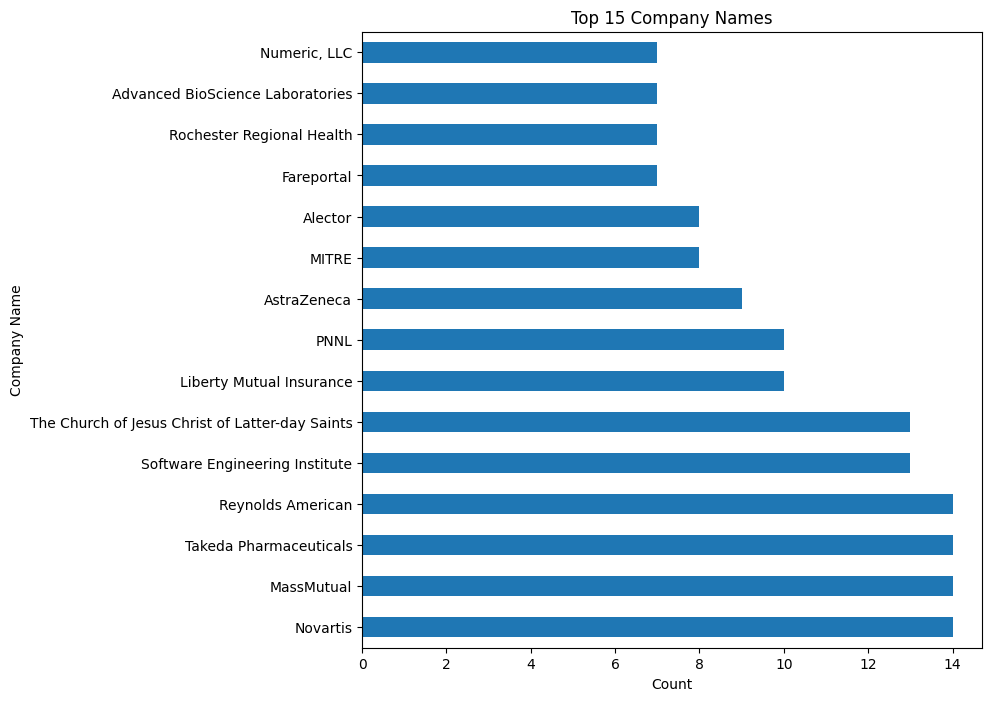

In [ ]:
# Cleaning Company Name column
df["Company Name"] = df['Company Name'].apply(lambda x: x.split("\n")[0])
plt.figure(figsize=(8,8))
g = df["Company Name"].value_counts().nlargest(15).plot(kind='barh')
p = plt.title('Top 15 Company Names')
p = plt.xlabel('Count')

In [ ]:
# Creating a column 'job_state'
df['job_location'] = df['Location'].apply(lambda x: x if ',' not in x else x.split(',')[1].strip())
print('Total number of unique locations: {}'.format(len(df['job_location'].unique())))

Total number of unique locations: 46


<ipython-input-26-10e71fab9905>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


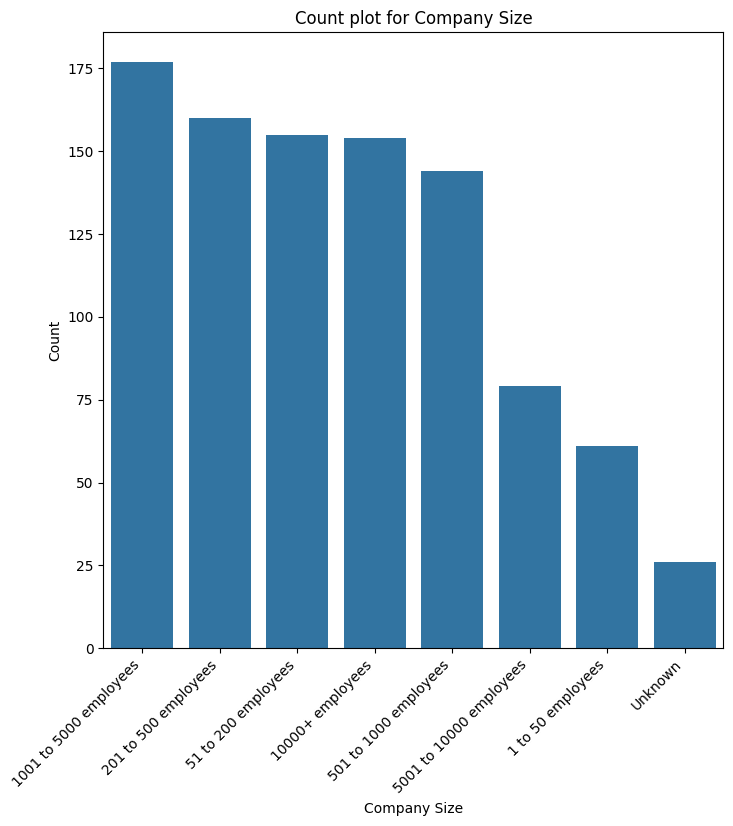

In [ ]:
# Cleaning 'Size' column
def size_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown'
  else:
    return text

df['Size'] = df['Size'].apply(size_simplifier)
plt.figure(figsize=(8,8))
g = sns.countplot(x='Size', data=df, order = df['Size'].value_counts().index)
p = plt.title('Count plot for Company Size')
p = plt.xlabel('Company Size')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
# Cleaning 'Type of Ownership' column
df['Type of ownership'].value_counts()

,count
Type of ownership,
Company - Private,532
Company - Public,237
Nonprofit Organization,65
Subsidiary or Business Segment,40
Government,17
Hospital,15
College / University,15
Unknown,11
-1,11


<ipython-input-28-a15912ed42fd>:17: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


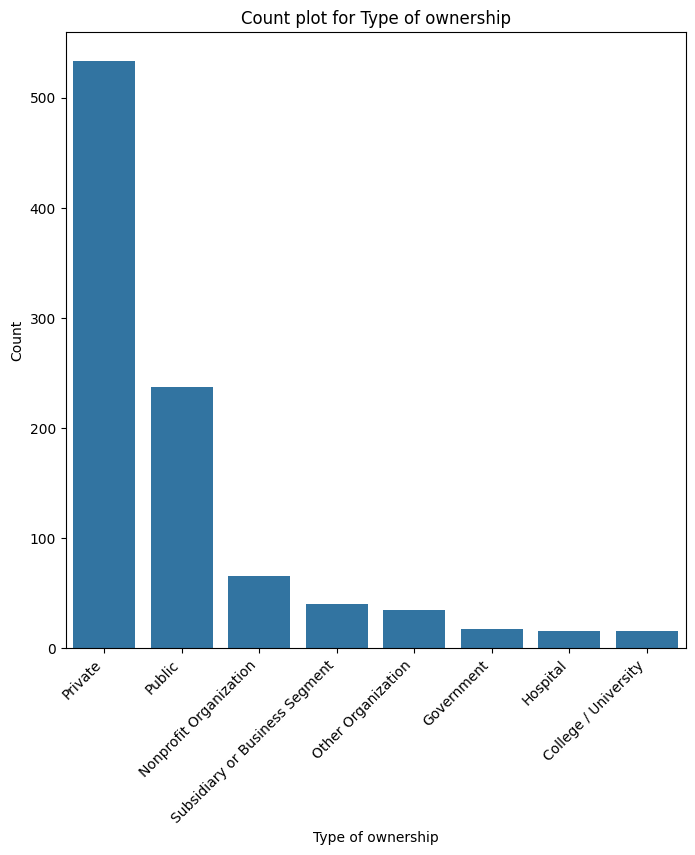

In [ ]:
def ownership_simplifier(text):
    if 'private' in text.lower():
      return 'Private'
    elif 'public' in text.lower():
      return 'Public'
    elif ('-1' in text.lower()) or ('unknown' in text.lower()) or ('school / school district' in text.lower()) or ('private practice / firm' in text.lower()) or ('contract' in text.lower()) :
      return 'Other Organization'
    else:
      return text

df['Type of ownership'] = df['Type of ownership'].apply(ownership_simplifier)
plt.figure(figsize=(8,8))
g = sns.countplot(x='Type of ownership', data=df, order = df['Type of ownership'].value_counts().index)
p = plt.title('Count plot for Type of ownership')
p = plt.xlabel('Type of ownership')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

In [ ]:
# Cleaning 'Industry' column
df['Industry'].value_counts()

,count
Industry,
Biotech & Pharmaceuticals,148
IT Services,77
Computer Hardware & Software,70
Insurance Carriers,65
Enterprise Software & Network Solutions,56
...,...
Farm Support Services,1
Transportation Equipment Manufacturing,1
Motion Picture Production & Distribution,1


<ipython-input-30-99a98ee0cba6>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


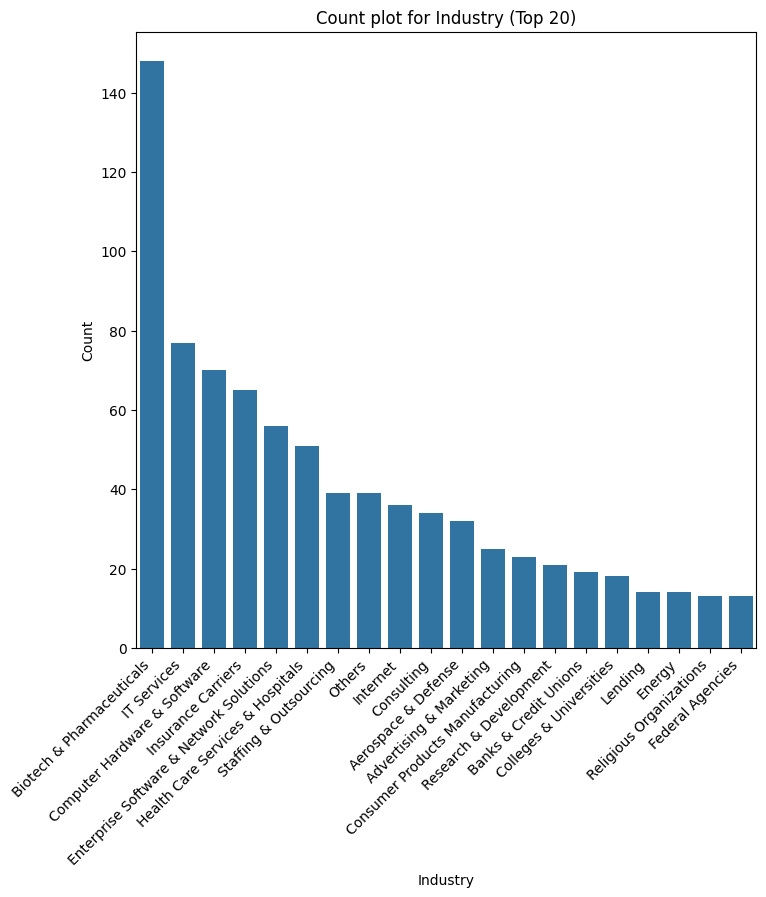

In [ ]:
df['Industry'] = df['Industry'].apply(lambda x: 'Others' if x=='-1' else x)
plt.figure(figsize=(8,8))
g = sns.countplot(x='Industry', data=df, order = df['Industry'].value_counts()[:20].index)
p = plt.title('Count plot for Industry (Top 20)')
p = plt.xlabel('Industry')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

<ipython-input-31-688e338c4e4b>:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


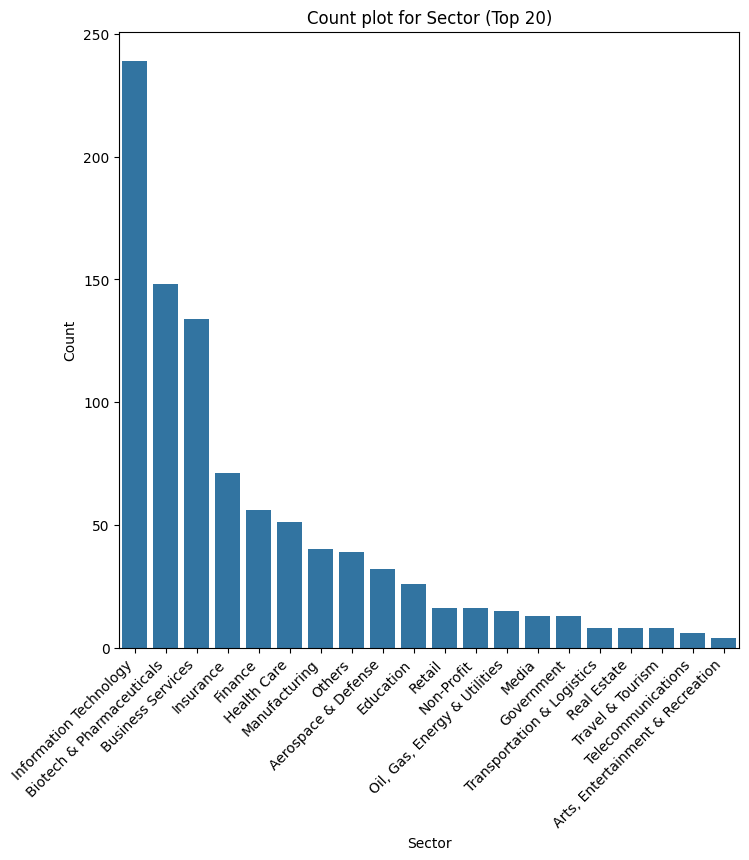

In [ ]:
df['Sector'] = df['Sector'].apply(lambda x: 'Others' if x=='-1' else x)
plt.figure(figsize=(8,8))
g = sns.countplot(x='Sector', data=df, order = df['Sector'].value_counts()[:20].index)
p = plt.title('Count plot for Sector (Top 20)')
p = plt.xlabel('Sector')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

<ipython-input-32-fb6d4a5dbbde>:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


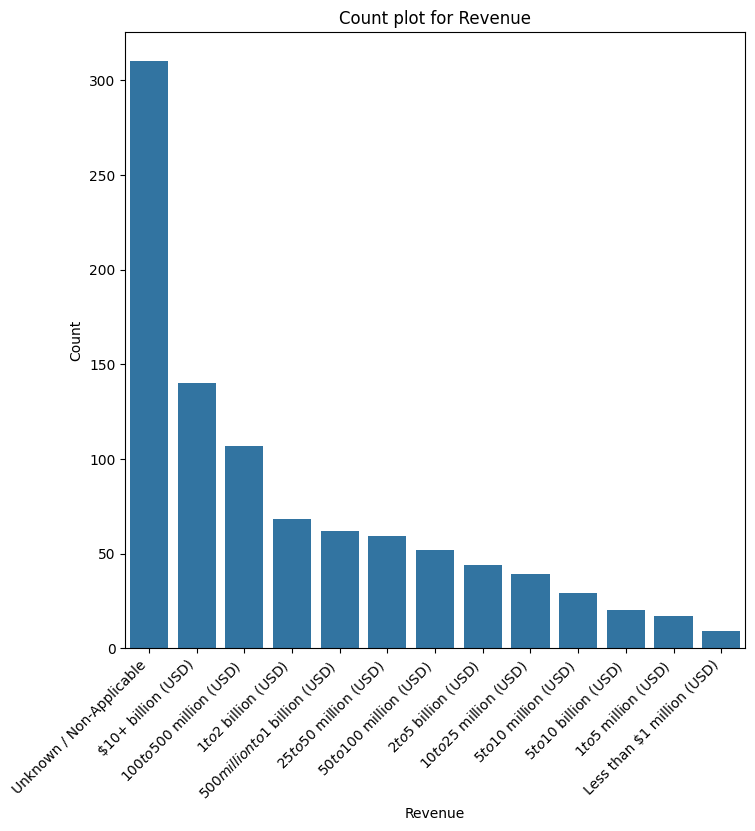

In [ ]:
def revenue_simplifier(text):
  if '-1' in text.lower():
    return 'Unknown / Non-Applicable'
  else:
    return text

df['Revenue'] = df['Revenue'].apply(revenue_simplifier)
plt.figure(figsize=(8,8))
g = sns.countplot(x='Revenue', data=df, order = df['Revenue'].value_counts().index)
p = plt.title('Count plot for Revenue')
p = plt.xlabel('Revenue')
p = plt.ylabel('Count')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

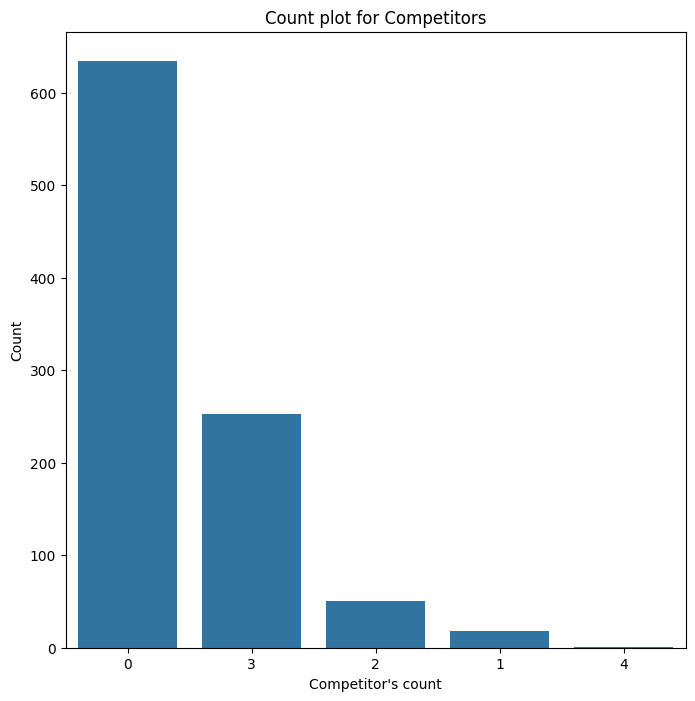

In [ ]:
df['Competitors'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)
plt.figure(figsize=(8,8))
g = sns.countplot(x='Competitors', data=df, order = df['Competitors'].value_counts().index)
p = plt.title('Count plot for Competitors')
p = plt.xlabel("Competitor's count")
p = plt.ylabel('Count')

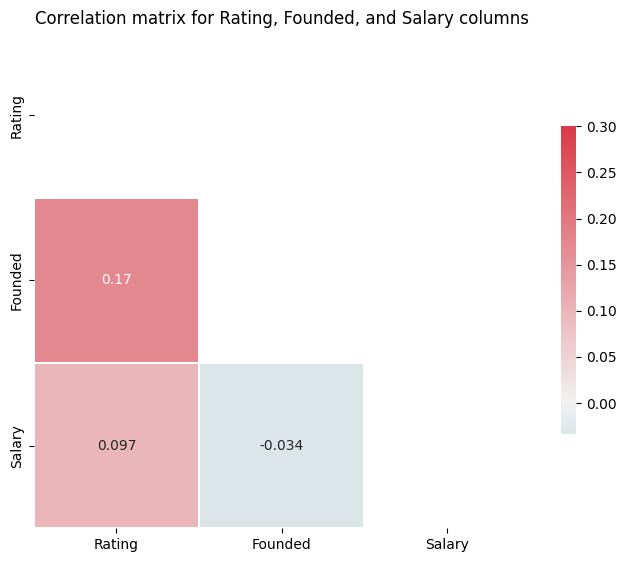

In [ ]:
# Finding and plotting the correlation between numerical features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(8,8))
corr = df[['Rating','Founded','Salary']].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

g = sns.heatmap(corr, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, annot=True, linewidths=0.05, cbar_kws={"shrink": .5})
p = plt.title('Correlation matrix for Rating, Founded, and Salary columns')

In [ ]:
# Creating column of 'job_in_headquarters'
df['job_in_headquarters'] = df.apply(lambda x: 1 if x['Location'] == x['Headquarters'] else 0, axis=1)
df.drop(labels=['Location'], axis=1, inplace=True)

In [ ]:
# Creating columns of 'python, excel, sql, tableau' jobs
df['python_job'] = df['Job Description'].apply(lambda x: 1 if 'python' in x.lower() else 0)
df['excel_job'] = df['Job Description'].apply(lambda x: 1 if 'excel' in x.lower() else 0)
df['sql_job'] = df['Job Description'].apply(lambda x: 1 if 'sql' in x.lower() else 0)
df['tableau_job'] = df['Job Description'].apply(lambda x: 1 if 'tableau' in x.lower() else 0)

In [ ]:
df.drop(labels=['Job Description'], axis=1, inplace=True)

In [ ]:
# Trimming the 'Sector' column

# Taking top 9 Sector and replacing remaining by 'Others'
sector_list = list(df['Sector'].value_counts()[:10].index)

def sector_simplifier(text):
  if text not in sector_list:
    return 'Others'
  else:
    return text

df['Sector'] = df['Sector'].apply(sector_simplifier)

In [ ]:
# Trimming the 'job_location' column

# Taking top 9 States and replacing others by 'Others'
job_location_list = list(df['job_location'].value_counts()[:9].index)

def job_location_simplifier(text):
  if text not in job_location_list:
    return 'Others'
  else:
    return text

df['job_location'] = df['job_location'].apply(job_location_simplifier)

In [ ]:
df.drop(labels=['Salary Estimate', 'Company Name', 'Headquarters', 'Industry', 'job_location'], axis=1, inplace=True)

In [ ]:
# Renaming columns
df.rename(columns={'Rating':'company_rating', 'Size':'company_size', 'Founded':'company_founded', 'Type of ownership':'type_of_ownership',
                   'Sector':'sector', 'Revenue':'revenue', 'Competitors':'competitors', 'Salary': 'salary'}, inplace=True)

In [ ]:
# Mapping ranks to 'company_size' column
size_map = {'Unknown': 0, '1 to 50 employees': 1, '51 to 200 employees': 2, '201 to 500 employees': 3,
            '501 to 1000 employees': 4, '1001 to 5000 employees': 5, '5001 to 10000 employees': 6, '10000+ employees': 7}

df['company_size'] = df['company_size'].map(size_map)
# Mapping ranks to 'revenue	' column
revenue_map = {'Unknown / Non-Applicable': 0, 'Less than $1 million (USD)': 1, '$1 to $5 million (USD)': 2, '$5 to $10 million (USD)': 3,
            '$10 to $25 million (USD)': 4, '$25 to $50 million (USD)': 5, '$50 to $100 million (USD)': 6, '$100 to $500 million (USD)': 7,
            '$500 million to $1 billion (USD)': 8, '$1 to $2 billion (USD)': 9, '$2 to $5 billion (USD)':10, '$5 to $10 billion (USD)':11,
            '$10+ billion (USD)':12}

df['revenue'] = df['revenue'].map(revenue_map)

# Mapping ranks to 'job_seniority	' column
job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}

df['job_seniority'] = df['job_seniority'].map(job_seniority_map)

In [ ]:
# Removing 'type_of_ownership' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['type_of_ownership'], data=df, prefix='ownership')
print('After: {}'.format(df.shape))

Before: (956, 15)
After: (956, 22)


In [ ]:
# Removing 'sector' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['sector'], data=df)
print('After: {}'.format(df.shape))

Before: (956, 22)
After: (956, 31)


In [ ]:
# Removing 'job_title' column using get_dummies()
print('Before: {}'.format(df.shape))
df = pd.get_dummies(columns=['job_title'], data=df)
print('After: {}'.format(df.shape))

Before: (956, 31)
After: (956, 37)


In [ ]:
# Removing 'others' column to reduce dimentionality and avoid dummy variable trap
df.drop(labels=['ownership_Other Organization', 'sector_Others', 'job_title_other'], axis=1, inplace=True)

In [ ]:
X = df.drop('salary', axis=1)
y = df['salary']

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression

fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(X, y)

SelectKBest(k='all',
            score_func=<function mutual_info_regression at 0x7b1e2c8dc790>)

<ipython-input-50-c15c5283eaa4>:9: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')


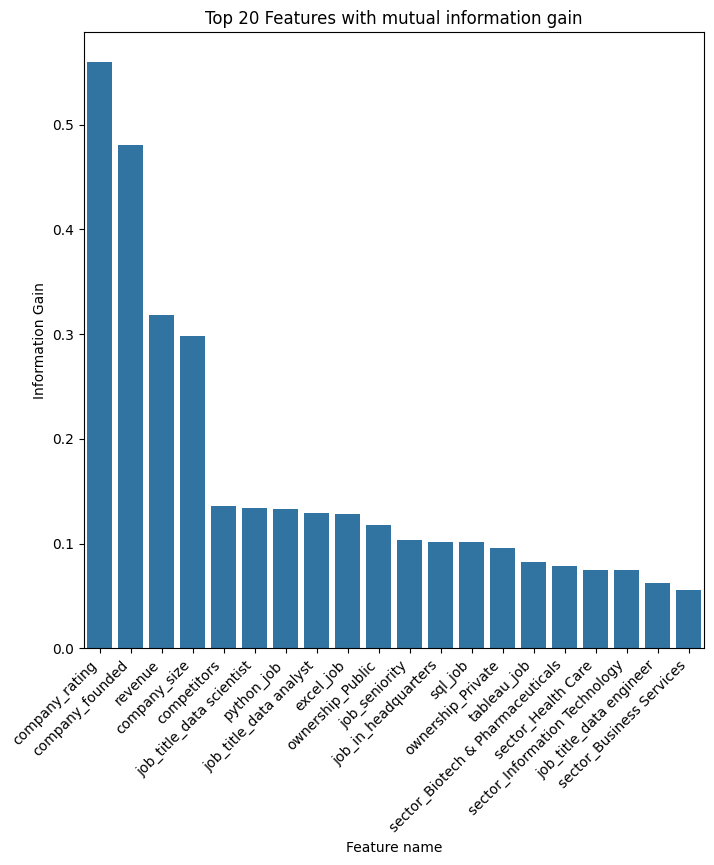

In [ ]:
feature_imp = pd.DataFrame(fs.scores_, columns=['Score'], index=X.columns)
top20_feature = feature_imp.nlargest(n=20, columns=['Score'])

plt.figure(figsize=(8,8))
g = sns.barplot(x=top20_feature.index, y=top20_feature['Score'])
p = plt.title('Top 20 Features with mutual information gain')
p = plt.xlabel('Feature name')
p = plt.ylabel('Information Gain')
p = g.set_xticklabels(g.get_xticklabels(), rotation=45, horizontalalignment='right')

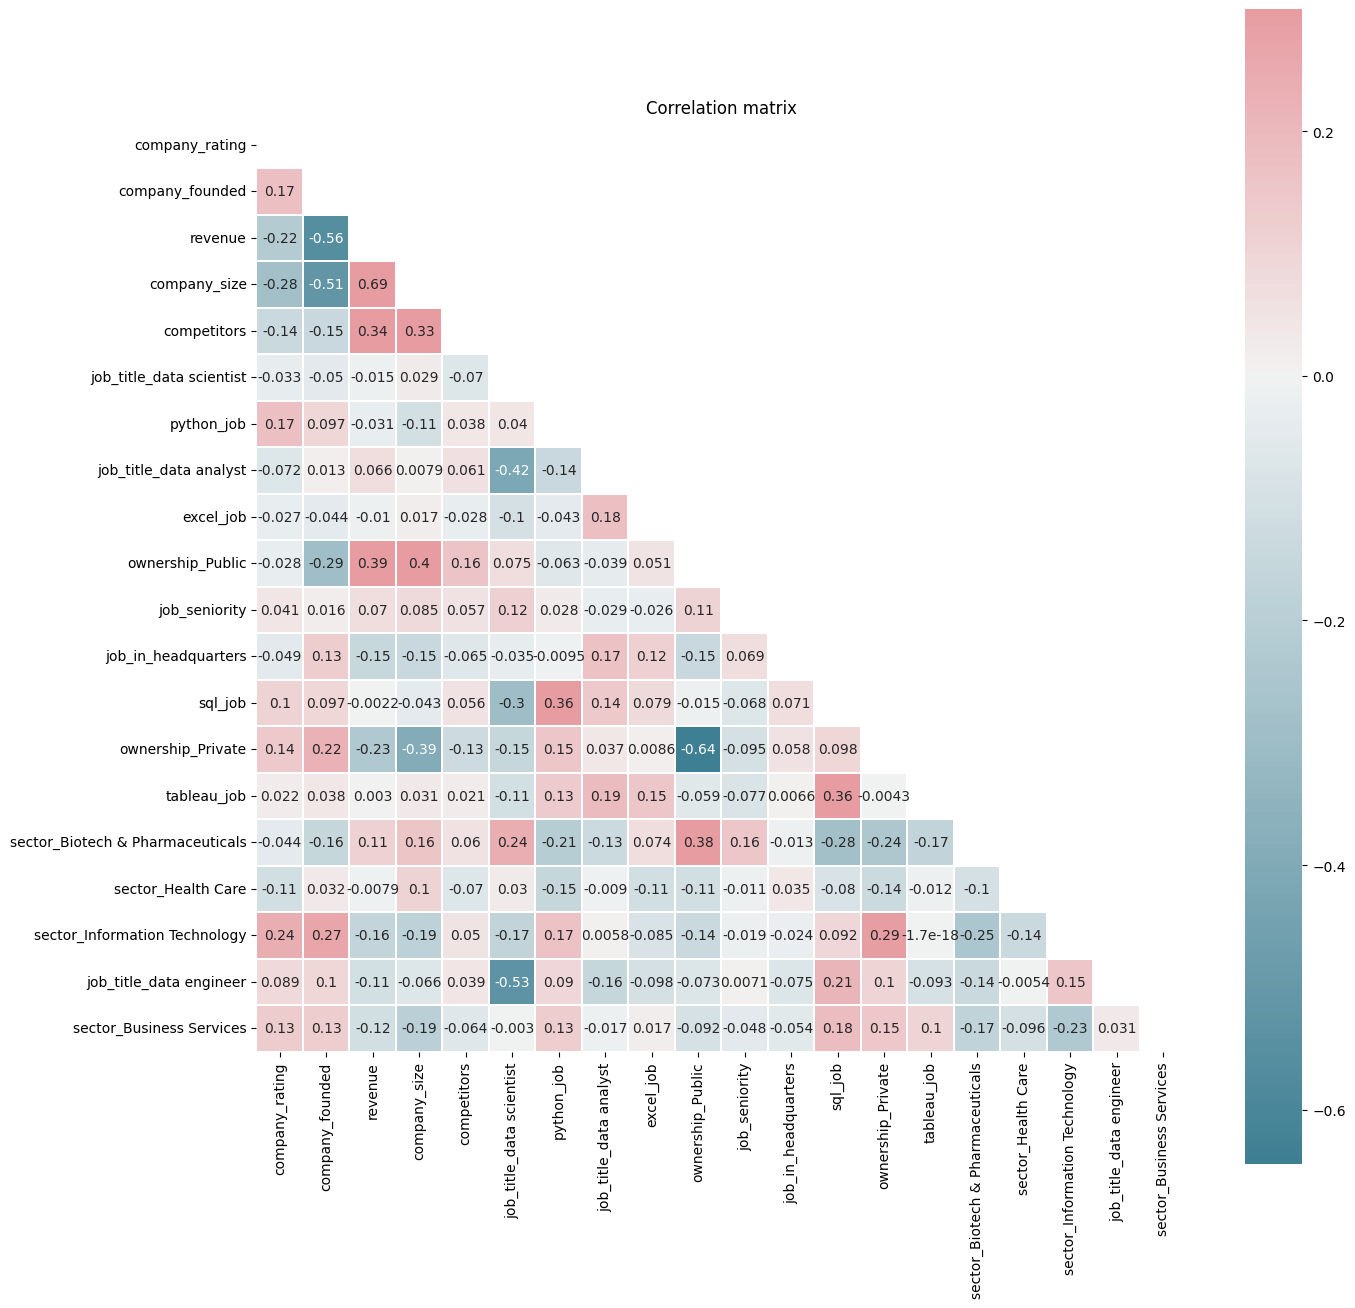

In [ ]:
# Finding and plotting the correlation matrix for top20 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X[top20_feature.index].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix')

<ipython-input-52-9a8f9b16d2ff>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(labels=['ownership_Public', 'company_size', 'revenue', 'job_title_data engineer'], axis=1, inplace=True)


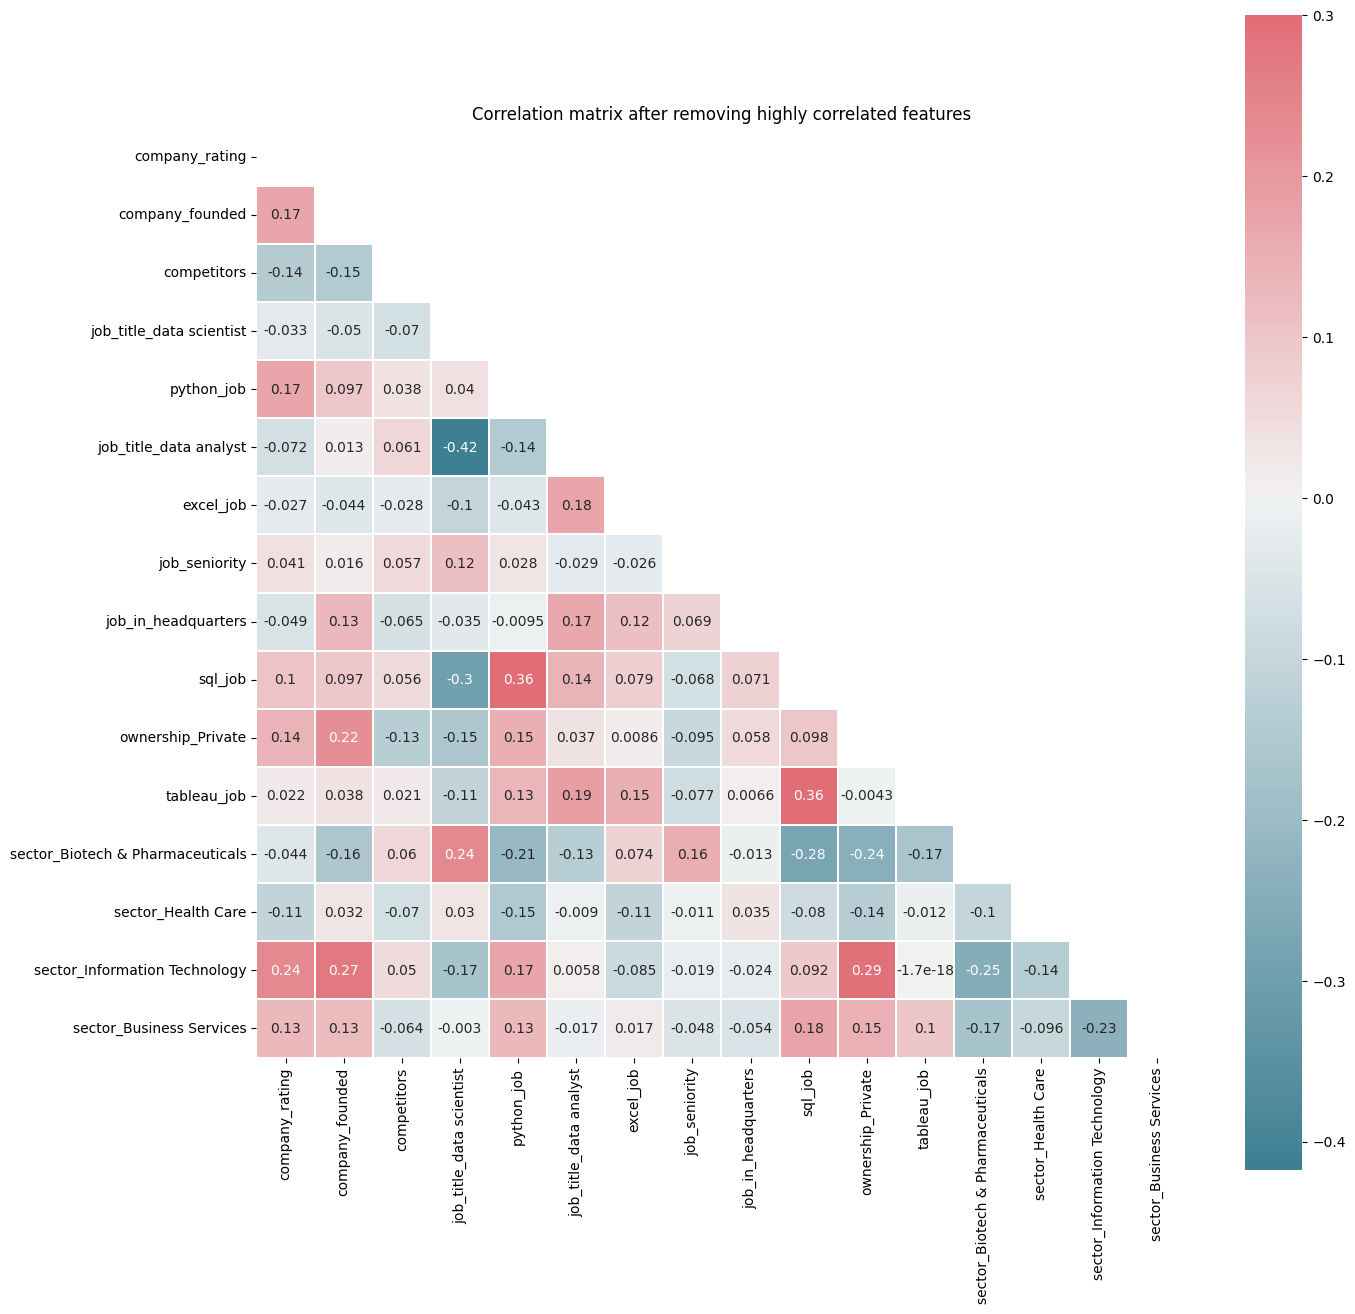

In [ ]:
X = X[top20_feature.index]
X.drop(labels=['ownership_Public', 'company_size', 'revenue', 'job_title_data engineer'], axis=1, inplace=True)
# Finding and plotting the correlation matrix for top 18 features

cmap = sns.diverging_palette(220, 10, as_cmap=True)
plt.figure(figsize=(15, 15))
corr = X.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

g = sns.heatmap(corr, annot=True, mask=mask, vmax=0.3, center=0, cmap=cmap, square=True, linewidths=0.05)
p = plt.title('Correlation matrix after removing highly correlated features')

In [ ]:
X = X[['company_rating', 'company_founded', 'competitors',
       'sector_Health Care', 'sector_Business Services', 'sector_Information Technology',
       'ownership_Private', 'sector_Biotech & Pharmaceuticals',
       'job_title_data scientist', 'job_title_data analyst', 'job_seniority', 'job_in_headquarters',
       'excel_job', 'python_job', 'tableau_job', 'sql_job',]]

<ipython-input-54-1df36f27da76>:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=X_prev['company_rating'])
<ipython-input-54-1df36f27da76>:20: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g = sns.distplot(a=X['company_rating'])


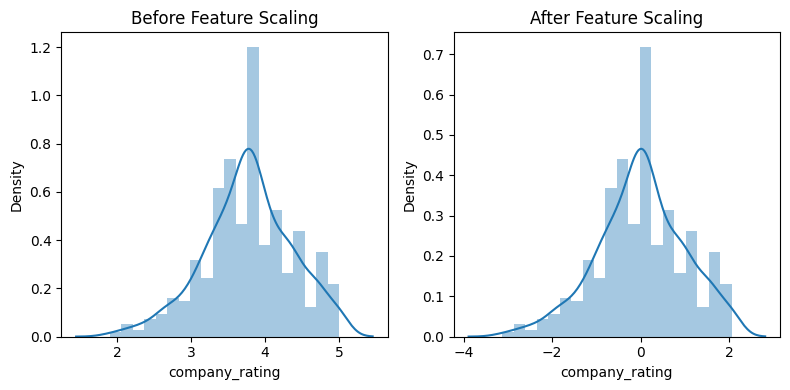

In [ ]:
#scaling the feature values between 0 to 1
from sklearn.preprocessing import StandardScaler
X_prev = X.copy()

sc_rating = StandardScaler()
X['company_rating'] = sc_rating.fit_transform(X[['company_rating']])

sc_founded = StandardScaler()
X['company_founded'] = sc_founded.fit_transform(X[['company_founded']])
# Plotting company_rating before & after feature scaling
plt.figure(figsize=(8, 4))

# 1-row, 2-column, go to the first subplot
plt.subplot(1, 2, 1)
g = sns.distplot(a=X_prev['company_rating'])
p = plt.title('Before Feature Scaling')

# 1-row, 2-column, go to the second subplot
plt.subplot(1, 2, 2)
g = sns.distplot(a=X['company_rating'])
p = plt.title('After Feature Scaling')

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score
# Fitting Multiple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
cv = cross_val_score(lr, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -27.523 ---
Standard Deviation: 2.307


In [ ]:
# Fitting Lasso Regression to the Training set
from sklearn.linear_model import Lasso
lasso = Lasso()
cv = cross_val_score(lasso, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -27.993 ---
Standard Deviation: 1.796


In [ ]:
# Fitting Random Forest to the Training set
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
cv = cross_val_score(rf, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -17.908 ---
Standard Deviation: 5.448


In [ ]:
# Fitting Gradient Boosting to the Training set
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
cv = cross_val_score(gb, X, y, cv=10, scoring='neg_root_mean_squared_error')
print('--- Average NRMSE: {} ---'.format(round(cv.mean(), 3)))
print('Standard Deviation: {}'.format(round(cv.std(), 3)))

--- Average NRMSE: -24.448 ---
Standard Deviation: 2.493


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Assuming you have X and y defined as in your previous code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Convert regression predictions to binary for classification metrics (e.g., threshold at median)
# Use numpy.median() instead of y_pred.median()
y_pred_binary = (y_pred > np.median(y_pred)).astype(int)
y_test_binary = (y_test > np.median(y_test)).astype(int)

# Calculate accuracy, precision, and F1 score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.7760416666666666
Precision: 0.65625
F1 Score: 0.7455621301775148


In [ ]:
# prompt: generate multilinear regression with precision accuracy and F1 score

# Assuming you have X and y defined as in your previous code

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Linear Regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lr.predict(X_test)

# Convert regression predictions to binary for classification metrics (e.g., threshold at median)
y_pred_binary = (y_pred > np.median(y_pred)).astype(int)
y_test_binary = (y_test > np.median(y_test)).astype(int)

# Calculate accuracy, precision, and F1 score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("Linear Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)


# Now, let's repeat the process for other models as needed (e.g., Lasso, Random Forest)


# Create and train the Lasso Regression model
lasso = Lasso()
lasso.fit(X_train, y_train)

# Make predictions on the test set
y_pred = lasso.predict(X_test)

# Convert regression predictions to binary for classification metrics
y_pred_binary = (y_pred > np.median(y_pred)).astype(int)

# Calculate accuracy, precision, and F1 score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("\nLasso Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)



# Create and train the Random Forest model
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Convert regression predictions to binary for classification metrics
y_pred_binary = (y_pred > np.median(y_pred)).astype(int)

# Calculate accuracy, precision, and F1 score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("\nRandom Forest Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

Linear Regression:
Accuracy: 0.6510416666666666
Precision: 0.53125
F1 Score: 0.6035502958579881

Lasso Regression:
Accuracy: 0.6354166666666666
Precision: 0.5157894736842106
F1 Score: 0.5833333333333334

Random Forest Regression:
Accuracy: 0.7760416666666666
Precision: 0.65625
F1 Score: 0.7455621301775148


In [ ]:
# prompt: generate SVM and PCA with F1 score accuracy and precision

from sklearn.svm import SVC, SVR # or SVR for regression
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np # Import numpy for median calculation

# Assuming X and y are defined as in your previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with PCA and SVM
# Use SVC for classification or SVR for regression
# If y is continuous, use SVR (Support Vector Regression)
#pipeline = Pipeline([
#    ('pca', PCA(n_components=0.95)),  # Keep 95% of variance
#    ('svm', SVC(kernel='linear'))
#])
pipeline = Pipeline([
    ('pca', PCA(n_components=0.95)),  # Keep 95% of variance
    ('svm', SVR(kernel='linear'))  # Use SVR for regression
])

# Train the pipeline
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Convert regression predictions to binary for classification metrics (e.g., threshold at median)
# If using SVR, you might need to adjust this part based on your specific needs
y_pred_binary = (y_pred > np.median(y_pred)).astype(int)
y_test_binary = (y_test > np.median(y_test)).astype(int)

# Calculate accuracy, precision, and F1 score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("SVM with PCA:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

SVM with PCA:
Accuracy: 0.6510416666666666
Precision: 0.53125
F1 Score: 0.6035502958579881


In [ ]:
# prompt: generate accuracy precision and F! score for gradient boosting

# Assuming X and y are defined as in your previous code

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Gradient Boosting model
gb = GradientBoostingRegressor()
gb.fit(X_train, y_train)

# Make predictions on the test set
y_pred = gb.predict(X_test)

# Convert regression predictions to binary for classification metrics (e.g., threshold at median)
y_pred_binary = (y_pred > np.median(y_pred)).astype(int)
y_test_binary = (y_test > np.median(y_test)).astype(int)

# Calculate accuracy, precision, and F1 score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("Gradient Boosting Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

Gradient Boosting Regression:
Accuracy: 0.6614583333333334
Precision: 0.5416666666666666
F1 Score: 0.6153846153846154


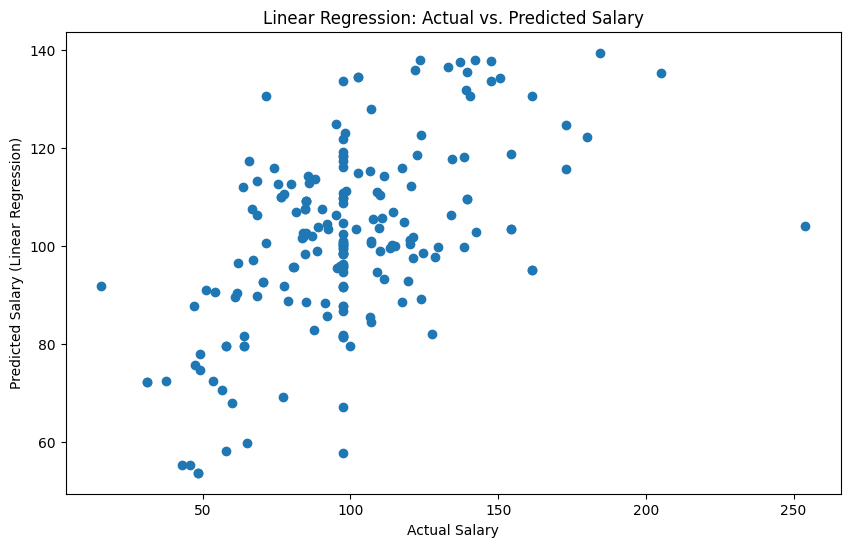

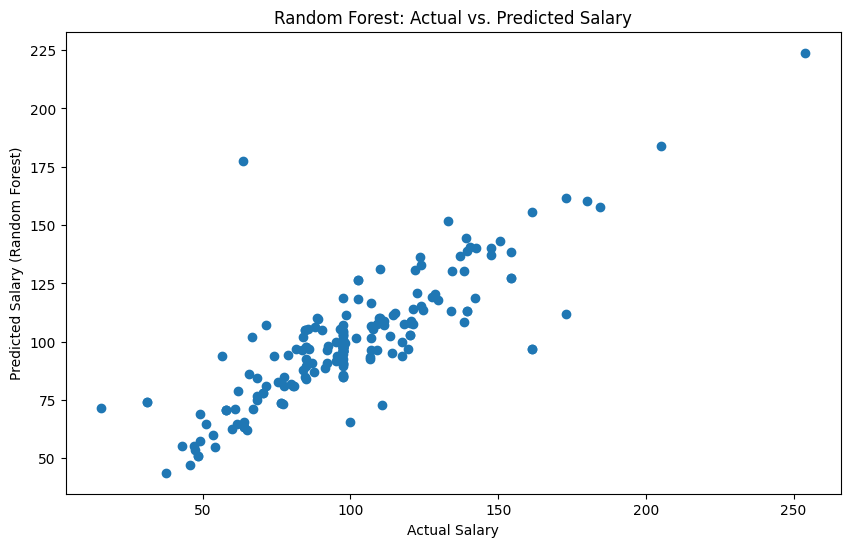

In [ ]:
# prompt: generate a graph for linear regression and random forest

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import numpy as np

# Assuming X and y are defined as in your previous code
# ... (Your data preprocessing and feature selection code) ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_y_pred = lr_model.predict(X_test)

# Train Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
rf_y_pred = rf_model.predict(X_test)

# Plot Linear Regression results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, lr_y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary (Linear Regression)")
plt.title("Linear Regression: Actual vs. Predicted Salary")
plt.show()

# Plot Random Forest results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_y_pred)
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary (Random Forest)")
plt.title("Random Forest: Actual vs. Predicted Salary")
plt.show()

In [ ]:


from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the Decision Tree Regression model
dt_model = DecisionTreeRegressor(random_state=42)  # You can adjust hyperparameters here
dt_model.fit(X_train, y_train)

# Make predictions on the test set
dt_y_pred = dt_model.predict(X_test)

# Evaluate the model using mean squared error
mse = mean_squared_error(y_test, dt_y_pred)
print("Decision Tree Regression Mean Squared Error:", mse)

y_pred_binary = (dt_y_pred > np.median(dt_y_pred)).astype(int)
y_test_binary = (y_test > np.median(y_test)).astype(int)

# Calculate accuracy
accuracy = accuracy_score(y_test_binary, y_pred_binary)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test_binary, y_pred_binary)
print("Precision:", precision)


# You can also visualize the decision tree using:
# from sklearn.tree import plot_tree
# plt.figure(figsize=(15, 10))
# plot_tree(dt_model, feature_names=X.columns, filled=True)
# plt.show()


Decision Tree Regression Mean Squared Error: 388.3766276041667
Accuracy: 0.875
Precision: 0.8656716417910447


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - loss: 11100.2285 - mae: 99.7235 - val_loss: 9848.1270 - val_mae: 94.9247
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 10538.9004 - mae: 96.8433 - val_loss: 7295.8887 - val_mae: 80.5378
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 6260.4951 - mae: 72.0376 - val_loss: 1934.9193 - val_mae: 35.6446
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1981.7980 - mae: 34.5299 - val_loss: 1223.2963 - val_mae: 27.0551
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1239.3918 - mae: 27.2554 - val_loss: 1005.3034 - val_mae: 24.3274
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1264.8246 - mae: 27.1100 - val_loss: 939.4673 - val_mae: 23.8320
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1123.4894 - mae: 26.4152 - val_loss: 869.1975 - val_mae: 22.7502
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 1143.4730 - mae: 26.3738 - val_loss: 855.3824 - val_mae: 22.7201
Epoch 9/50
20/20 ━━

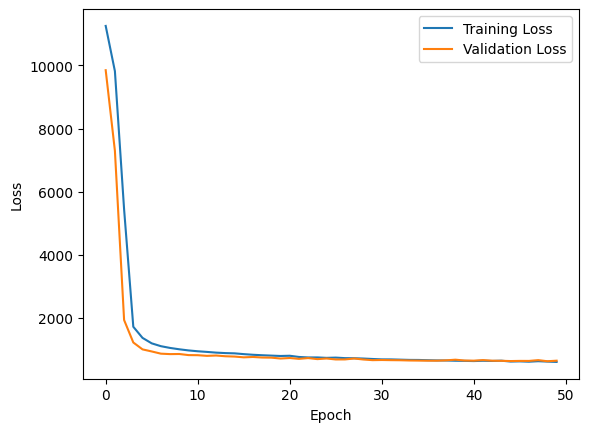

In [ ]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Assuming X and y are defined as in your previous code

# Define the ANN model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X.shape[1],)),  # Input layer with 128 neurons and ReLU activation
    layers.Dense(64, activation='relu'),  # Hidden layer with 64 neurons and ReLU activation
    layers.Dense(32, activation='relu'),  # Hidden layer with 32 neurons and ReLU activation
    layers.Dense(1)  # Output layer with 1 neuron for regression
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print("Mean Squared Error (MSE):", loss)
print("Mean Absolute Error (MAE):", mae)

# Make predictions
y_pred = model.predict(X_test)

# Convert regression predictions to binary for classification metrics (e.g., threshold at median)
y_pred_binary = (y_pred > np.median(y_pred)).astype(int)
y_test_binary = (y_test > np.median(y_test)).astype(int)

# Calculate accuracy, precision, and F1 score
accuracy = accuracy_score(y_test_binary, y_pred_binary)
precision = precision_score(y_test_binary, y_pred_binary)
f1 = f1_score(y_test_binary, y_pred_binary)

print("ANN Regression:")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F1 Score:", f1)

# Plot training history (optional)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [ ]:
rf = RandomForestRegressor()
rf.fit(X, y)

RandomForestRegressor()

In [ ]:
RandomForestRegressor()

RandomForestRegressor()

In [ ]:
def predict_salary(rating, founded, competitors, sector, ownership, job_title, job_in_headquarters, job_seniority, job_skills):

  prediction_input = list()

  prediction_input.append(sc_rating.transform(np.array(rating).reshape(1, -1)))
  prediction_input.append(sc_founded.transform(np.array(founded).reshape(1, -1)))
  prediction_input.append(competitors)


  sector_columns = ['sector_Biotech & Pharmaceuticals', 'sector_Health Care',
                    'sector_Business Services','sector_Information Technology']
  temp = list(map(int, np.zeros(shape=(1, len(sector_columns)))[0]))
  for index in range(0, len(sector_columns)):
    if sector_columns[index] == 'sector_' + sector:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  if ownership == 'Private':
    prediction_input.append(1)
  else:
    prediction_input.append(0)


  job_title_columns = ['job_title_data scientist', 'job_title_data analyst']
  temp = list(map(int, np.zeros(shape=(1, len(job_title_columns)))[0]))
  for index in range(0, len(job_title_columns)):
    if job_title_columns[index] == 'job_title_' + job_title:
      temp[index] = 1
      break
  prediction_input = prediction_input + temp


  prediction_input.append(job_in_headquarters)


  job_seniority_map = {'other': 0, 'jr': 1, 'sr': 2}
  prediction_input.append(job_seniority_map[job_seniority])


  temp = list(map(int, np.zeros(shape=(1, 4))[0]))
  if 'excel' in job_skills:
    temp[0] = 1
  if 'python' in job_skills:
    temp[1] = 1
  if 'tableau' in job_skills:
    temp[2] = 1
  if 'sql' in job_skills:
    temp[3] = 1
  prediction_input = prediction_input + temp


  return rf.predict([prediction_input])[0]

In [ ]:
# Prediction 1
# Input sequence: 'company_rating', 'company_founded', 'competitors_count',
#                 'company_sector', 'company_ownership', 'job_title', 'job_in_headquarters',
#                 'job_seniority', 'job_skills'

salary = predict_salary(4.5, 1969, 3, 'Information Technology', 'Private', 'data scientist', 1, 'sr', ['python', 'sql', 'tableau'])
print('Estimated salary (range): {}(USD) to {}(USD) per annum.'.format(int(salary*1000)-9000, int(salary*1000)+9000))

Estimated salary (range): 94726(USD) to 112726(USD) per annum.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
